In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [2]:
#Carga la base de datos
DM= pd.read_csv('diamonds.csv') 
#Verificamos información del DataFrame
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53937 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53937 non-null  float64
 6   price    53937 non-null  float64
 7   x        53939 non-null  float64
 8   y        53939 non-null  float64
 9   z        53936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [3]:
#valores nulos
valores_nulos=DM.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [4]:
#dataframe con "bfill"
DMclean =DM.fillna(method="ffill") 
DMclean =DMclean.fillna(method="bfill") 

C:\Users\Max\AppData\Local\Temp\ipykernel_1184\2090334972.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  DMclean =DM.fillna(method="ffill")
C:\Users\Max\AppData\Local\Temp\ipykernel_1184\2090334972.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  DMclean =DMclean.fillna(method="bfill")


In [5]:
#check de valores nulos del dataframe
ValN=DMclean.isnull().sum()
ValN

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#info MRclean
DMclean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


<Figure size 2000x1000 with 0 Axes>

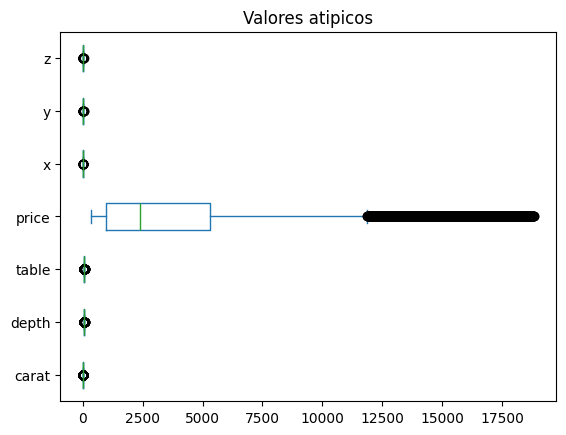

In [10]:
#Outliers
columnas_cualitativas = DMclean.select_dtypes(include = 'object')
columnas_cuantitativas = DMclean.select_dtypes(include = ['int64', 'float64'])
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [11]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido carat        2.220013
depth       66.047343
table       64.160565
price    15901.118934
x            9.096451
y            9.160930
z            5.655821
dtype: float64
Limite inferior permitido carat      -0.624106
depth      57.451549
table      50.753914
price   -8035.519527
x           2.365846
y           2.308122
z           1.421640
dtype: float64


In [12]:
#columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
#nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

carat     412
depth     685
table     336
price    1206
x          43
y          34
z          55
dtype: int64

In [15]:
#Copia del DM y MEAN FILL
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

#QUANT & QUAL
DMclean2 = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
DMclean2.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2


In [17]:
#Comprobamos
DMclean2.isnull().sum()

carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64

In [18]:
#Correlación
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.011210,0.185164,0.851292,0.958470,0.957180,0.956364
depth,0.011210,1.000000,0.277018,0.002333,0.031849,0.033720,0.074948
table,0.185164,0.277018,1.000000,0.128062,0.195985,0.190797,0.159839
price,0.851292,0.002333,0.128062,1.000000,0.842965,0.844281,0.840173
x,0.958470,0.031849,0.195985,0.842965,1.000000,0.997742,0.989128
y,0.957180,0.033720,0.190797,0.844281,0.997742,1.000000,0.988673
z,0.956364,0.074948,0.159839,0.840173,0.989128,0.988673,1.000000


0.8512916293553041

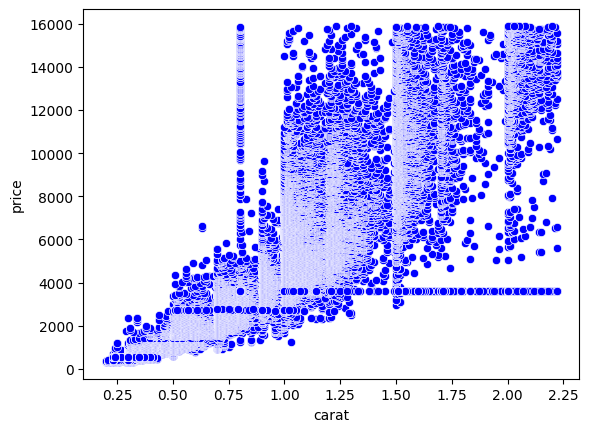

In [19]:
#A) carat
#Declaramos las variables dependientes e independientes para la regresión lineal
indvar= columnas_cuantitativas_limpio[['carat']]
depvar= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=indvar, y=depvar)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='carat', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=indvar, y=depvar)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.002332974561871793

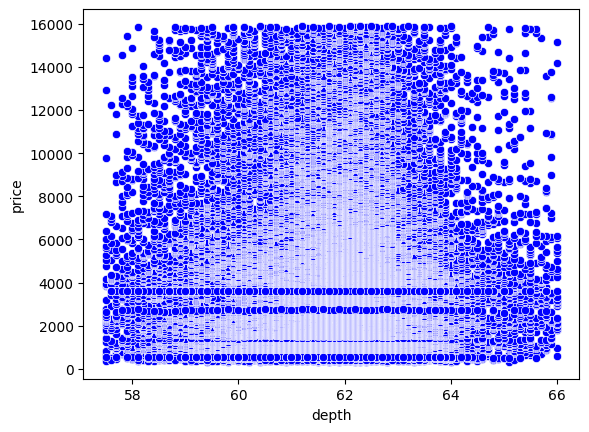

In [20]:
#B) depth
#Declaramos las variables dependientes e independientes para la regresión lineal
indvar2= columnas_cuantitativas_limpio[['depth']]
depvar2= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=indvar2, y=depvar2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='depth', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter2=model2.score(X=indvar2, y=depvar2)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.12806180435209646

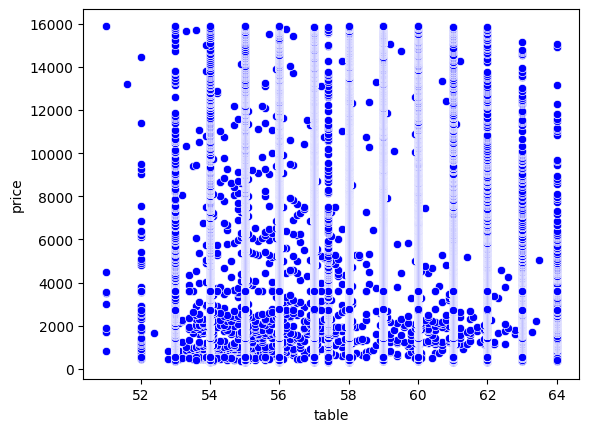

In [22]:
#c) depth
#Declaramos las variables dependientes e independientes para la regresión lineal
indvar3= columnas_cuantitativas_limpio[['table']]
depvar3= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=indvar3, y=depvar3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='table', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter3=model3.score(X=indvar3, y=depvar3)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

In [23]:
#variables dependientes e independientes para la regresión lineal
indvarMultD= columnas_cuantitativas_limpio[["carat","depth"]]
depvarMultD= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultD= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultD.fit(X=indvarMultD, y=depvarMultD)

modelMultD.__dict__

coef_DeterMultD=modelMultD.score(X=indvarMultD, y=depvarMultD)
coef_CorrelMultD=np.sqrt(coef_DeterMultD)
coef_CorrelMultD

0.8513744787365709

In [25]:
#E
#variables dependientes e independientes para la regresión lineal
indvarMultE= columnas_cuantitativas_limpio[["carat","table"]]
depvarMultE= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultE= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultE.fit(X=indvarMultE, y=depvarMultE)

modelMultE.__dict__

coef_DeterMultE=modelMultE.score(X=indvarMultE, y=depvarMultE)
coef_CorrelMultE=np.sqrt(coef_DeterMultE)
coef_CorrelMultE

0.8518231584872071

In [26]:
#F
#variables dependientes e independientes para la regresión lineal
indvarMultF= columnas_cuantitativas_limpio[["depth","table"]]
depvarMultF= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultF= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultF.fit(X=indvarMultF, y=depvarMultF)

modelMultF.__dict__

coef_DeterMultF=modelMultF.score(X=indvarMultF, y=depvarMultF)
coef_CorrelMultF=np.sqrt(coef_DeterMultF)
coef_CorrelMultF

0.13262557913951853

In [28]:
#G
#variables dependientes e independientes para la regresión lineal
indvarMultG= columnas_cuantitativas_limpio[["x","y","z"]]
depvarMultG= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultG= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultG.fit(X=indvarMultG, y=depvarMultG)

modelMultG.__dict__

coef_DeterMultG=modelMultG.score(X=indvarMultG, y=depvarMultG)
coef_CorrelMultG=np.sqrt(coef_DeterMultG)
coef_CorrelMultG

0.8450637705949012

In [29]:
#H
#variables dependientes e independientes para la regresión lineal
indvarMultH= columnas_cuantitativas_limpio[["x","y","z", "carat", "depth"]]
depvarMultH= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultH= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultH.fit(X=indvarMultH, y=depvarMultH)

modelMultH.__dict__

coef_DeterMultH=modelMultH.score(X=indvarMultH, y=depvarMultH)
coef_CorrelMultH=np.sqrt(coef_DeterMultH)
coef_CorrelMultH

0.8575583399404237

In [30]:
#I
#variables dependientes e independientes para la regresión lineal
indvarMultI= columnas_cuantitativas_limpio[["x","y","z", "carat", "depth", "table"]]
depvarMultI= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMultI= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMultI.fit(X=indvarMultI, y=depvarMultI)

modelMultI.__dict__

coef_DeterMultI=modelMultI.score(X=indvarMultI, y=depvarMultI)
coef_CorrelMultI=np.sqrt(coef_DeterMultI)
coef_CorrelMultI

0.858220301405945